<a href="https://colab.research.google.com/github/Prakhar2025/Ice-Cream/blob/main/Deepfake_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
!pip install --upgrade tensorflow
# or
!conda update tensorflow

/bin/bash: line 1: conda: command not found


In [ ]:
# System & General libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import time
from collections import defaultdict

# Image Processing & Computer Vision
import cv2

# Machine Learning & Deep Learning
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split



# Data Visualization
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_theme(style='whitegrid', palette='viridis', font_scale=1.2)

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mp = defaultdict(lambda: "Not Present")
mp['/device:GPU:0'] = 'GPU T4 x2'
if tf.test.is_gpu_available():
    device = tf.test.gpu_device_name()
    print(f'✅ GPU is available: {mp[device]}')
else:
    print('⚠️ No GPU available. Using CPU.')
print(f'🔸 Tensorflow Version: {tf.__version__}')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


✅ GPU is available: GPU T4 x2
🔸 Tensorflow Version: 2.18.0


In [ ]:
def get_data():
    return pd.read_csv('/content/drive/MyDrive/metadata.csv (1)/metadata.csv')

meta = get_data()
meta.head()

videoname  original_width  original_height label        original
0  aznyksihgl.mp4             129              129  FAKE  xnojggkrxt.mp4
1  gkwmalrvcj.mp4             129              129  FAKE  hqqmtxvbjj.mp4
2  lxnqzocgaq.mp4             223              217  FAKE  xjzkfqddyk.mp4
3  itsbtrrelv.mp4             186              186  FAKE  kqvepwqxfe.mp4
4  ddvgrczjno.mp4             155              155  FAKE  pluadmqqta.mp4

In [ ]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['count'] = df.count().values
    summary_df['unique'] = df.nunique().values
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = df.isna().sum() / len(df)
    return summary_df
summary(meta).style.background_gradient('Purples')

In [ ]:
print('Fake Images:', len(meta[meta.label=='FAKE']))
print('Real Images:', len(meta[meta.label=='REAL']))

Fake Images: 79341
Real Images: 16293


In [ ]:
real_df = meta[meta['label'] == 'REAL']
fake_df = meta[meta['label'] == 'FAKE']
sample_size = 16000

real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)

sample_meta = pd.concat([real_df, fake_df])

In [ ]:
Train_set, Test_set = train_test_split(sample_meta, test_size=0.2, random_state=42, stratify=sample_meta['label'])
Train_set, Val_set = train_test_split(Train_set, test_size=0.3, random_state=42, stratify=Train_set['label'])

# (Rows, Columns)
print(f'Train Set: {Train_set.shape}')
print(f'Validation Set: {Val_set.shape}')
print(f'Test Set: {Test_set.shape}')

Train Set: (17920, 5)
Validation Set: (7680, 5)
Test Set: (6400, 5)


In [ ]:
def plot_class_counts(train_set, val_set, test_set):
    sets = ['Train Set', 'Validation Set', 'Test Set']
    colors = ['#52A666', '#C15B4E']

    y = {
        'REAL': [np.sum(train_set == 'REAL'), np.sum(val_set == 'REAL'), np.sum(test_set == 'REAL')],
        'FAKE': [np.sum(train_set == 'FAKE'), np.sum(val_set == 'FAKE'), np.sum(test_set == 'FAKE')]
    }

    trace0 = go.Bar(x=sets, y=y['REAL'], name='REAL', marker={'color': colors[0]}, opacity=0.7)
    trace1 = go.Bar(x=sets, y=y['FAKE'], name='FAKE', marker={'color': colors[1]}, opacity=0.7)

    data = [trace0, trace1]
    layout = go.Layout(title='Count of Classes in each set:', xaxis={'title': 'Set'}, yaxis={'title': 'Count'})

    fig = go.Figure(data, layout)
    iplot(fig)

plot_class_counts(np.array(Train_set['label']), np.array(Val_set['label']), np.array(Test_set['label']))

In [ ]:
for idx, i in enumerate(Train_set.index[75:100]):
    file_path = '/content/drive/MyDrive/faces_224' + Train_set.loc[i, 'videoname'][:-4] + '.jpg'
    print(f"Checking file path: {file_path}")


Checking file path: /content/drive/MyDrive/faces_224tkygmnaifp.jpg
Checking file path: /content/drive/MyDrive/faces_224gwhirvvovr.jpg
Checking file path: /content/drive/MyDrive/faces_224rzlxpvmdob.jpg
Checking file path: /content/drive/MyDrive/faces_224krpbbuhnwp.jpg
Checking file path: /content/drive/MyDrive/faces_224bfnossqoxp.jpg
Checking file path: /content/drive/MyDrive/faces_224mtdawjxbgw.jpg
Checking file path: /content/drive/MyDrive/faces_224hdgffsmrtd.jpg
Checking file path: /content/drive/MyDrive/faces_224insaitlrup.jpg
Checking file path: /content/drive/MyDrive/faces_224njewytntow.jpg
Checking file path: /content/drive/MyDrive/faces_224dhtwqllwch.jpg
Checking file path: /content/drive/MyDrive/faces_224ugdepqjmlc.jpg
Checking file path: /content/drive/MyDrive/faces_224qyoycygwqu.jpg
Checking file path: /content/drive/MyDrive/faces_224rzxslqqecc.jpg
Checking file path: /content/drive/MyDrive/faces_224scxustzywt.jpg
Checking file path: /content/drive/MyDrive/faces_224qrubhcdcou

In [ ]:
import os

for idx, i in enumerate(Train_set.index[75:100]):
    file_path = '/content/drive/MyDrive/faces_224' + Train_set.loc[i, 'videoname'][:-4] + '.jpg'

    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
    else:
        print(f"File exists: {file_path}")


File not found: /content/drive/MyDrive/faces_224tkygmnaifp.jpg
File not found: /content/drive/MyDrive/faces_224gwhirvvovr.jpg
File not found: /content/drive/MyDrive/faces_224rzlxpvmdob.jpg
File not found: /content/drive/MyDrive/faces_224krpbbuhnwp.jpg
File not found: /content/drive/MyDrive/faces_224bfnossqoxp.jpg
File not found: /content/drive/MyDrive/faces_224mtdawjxbgw.jpg
File not found: /content/drive/MyDrive/faces_224hdgffsmrtd.jpg
File not found: /content/drive/MyDrive/faces_224insaitlrup.jpg
File not found: /content/drive/MyDrive/faces_224njewytntow.jpg
File not found: /content/drive/MyDrive/faces_224dhtwqllwch.jpg
File not found: /content/drive/MyDrive/faces_224ugdepqjmlc.jpg
File not found: /content/drive/MyDrive/faces_224qyoycygwqu.jpg
File not found: /content/drive/MyDrive/faces_224rzxslqqecc.jpg
File not found: /content/drive/MyDrive/faces_224scxustzywt.jpg
File not found: /content/drive/MyDrive/faces_224qrubhcdcou.jpg
File not found: /content/drive/MyDrive/faces_224wmbsdtz

In [ ]:
file_path = f"/content/drive/MyDrive/faces_224/{Train_set.loc[i, 'videoname'][:-4]}.jpg"


In [ ]:
img = cv2.imread(file_path)

if img is None:
    print(f"Failed to load image: {file_path}")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()


Failed to load image: /content/drive/MyDrive/faces_224/wcvyiarpfo.jpg


In [ ]:
import os

image_folder = "/content/drive/MyDrive/faces_224"
available_images = set(os.listdir(image_folder))  # List all files in the folder
print(f"Total available images: {len(available_images)}")


Total available images: 5740


In [ ]:
def is_image_available(row):
    image_name = row["videoname"][:-4] + ".jpg"  # Convert video name to image name
    return image_name in available_images

# Apply filtering
Train_set_filtered = Train_set[Train_set.apply(is_image_available, axis=1)].reset_index(drop=True)

print(f"Filtered dataset size: {len(Train_set_filtered)} (was {len(Train_set)})")


Filtered dataset size: 1102 (was 17920)


In [ ]:
plt.figure(figsize=(15,15), dpi=300)

for idx, i in enumerate(Train_set_filtered.index[75:100]):
    plt.subplot(5,5,idx+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    file_path = os.path.join(image_folder, Train_set_filtered.loc[i, 'videoname'][:-4] + '.jpg')

    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.xlabel('FAKE Image' if Train_set_filtered.loc[i,'label']=='FAKE' else 'REAL Image')

plt.tight_layout()
plt.show()



# import os
# import cv2
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 15), dpi=300)

# # Ensure we do not exceed the index range
# start_index = 75
# end_index = min(100, len(Train_set_filtered.index))

# for idx, i in enumerate(Train_set_filtered.index[start_index:end_index]):
#     plt.subplot(5, 5, idx + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)

#     file_path = os.path.join(image_folder, Train_set_filtered.loc[i, 'videoname'][:-4] + '.jpg')

#     # Error handling for image reading
#     img = cv2.imread(file_path)
#     if img is not None:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         plt.imshow(img)
#         plt.xlabel('FAKE Image' if Train_set_filtered.loc[i, 'label'] == 'FAKE' else 'REAL Image')
#     else:
#         plt.text(0.5, 0.5, 'Image Not Found', fontsize=12, ha='center')

# plt.tight_layout()
# plt.show()



In [ ]:
import os
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor

def load_image(file_path):
    """ Helper function to load and resize an image """
    if os.path.exists(file_path):
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))  # Resize to reduce memory usage
        return img
    return None  # Return None if the image is missing

def retrieve_dataset(set_name):
    images, labels = [], []
    image_folder = "/content/drive/MyDrive/faces_224/"

    file_paths = [os.path.join(image_folder, img[:-4] + ".jpg") for img in set_name['videoname']]
    labels = [1 if label == 'FAKE' else 0 for label in set_name['label']]

    # Use multithreading to speed up image loading
    with ThreadPoolExecutor(max_workers=8) as executor:  # 8 threads for parallel execution
        images = list(executor.map(load_image, file_paths))

    # Remove any `None` values (if images were missing)
    images, labels = zip(*[(img, label) for img, label in zip(images, labels) if img is not None])

    return np.array(images, dtype=np.uint8), np.array(labels, dtype=np.uint8)

In [ ]:
import os

image_folder = "/content/drive/MyDrive/faces_224"
available_images = set(os.listdir(image_folder))  # Get list of available images

def is_image_available(row):
    image_name = row["videoname"][:-4] + ".jpg"  # Convert video name to image name
    return image_name in available_images

# ✅ Apply filtering to Val_set and Test_set
Val_set_filtered = Val_set[Val_set.apply(is_image_available, axis=1)].reset_index(drop=True)
Test_set_filtered = Test_set[Test_set.apply(is_image_available, axis=1)].reset_index(drop=True)

print(f"✅ Filtered Val_set size: {len(Val_set_filtered)} (was {len(Val_set)})")
print(f"✅ Filtered Test_set size: {len(Test_set_filtered)} (was {len(Test_set)})")


✅ Filtered Val_set size: 446 (was 7680)
✅ Filtered Test_set size: 347 (was 6400)


In [ ]:
import time

start_time = time.time()

# Run dataset retrieval using filtered datasets
X_train, y_train = retrieve_dataset(Train_set_filtered)
X_val, y_val = retrieve_dataset(Val_set_filtered)
X_test, y_test = retrieve_dataset(Test_set_filtered)

end_time = time.time()

print(f"\n✅ Data loading completed in {end_time - start_time:.2f} seconds")



✅ Data loading completed in 128.72 seconds


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1102, 224, 224, 3)
y_train shape: (1102,)
X_val shape: (446, 224, 224, 3)
y_val shape: (446,)
X_test shape: (347, 224, 224, 3)
y_test shape: (347,)


In [ ]:
import time
import tensorflow as tf

start_time = time.time()  # Start time tracking

tf.keras.backend.clear_session()  # Clear previous session to avoid conflicts
tf.random.set_seed(42)

batch_size = 16
preprocess = tf.keras.applications.efficientnet.preprocess_input  # EfficientNet preprocessing function

# Convert dataset to TensorFlow tensors
train_set_raw = tf.data.Dataset.from_tensor_slices((X_train, tf.cast(y_train, tf.int32)))
valid_set_raw = tf.data.Dataset.from_tensor_slices((X_val, tf.cast(y_val, tf.int32)))
test_set_raw = tf.data.Dataset.from_tensor_slices((X_test, tf.cast(y_test, tf.int32)))

# Preprocess and batch datasets [size: 16]
train_set = (
    train_set_raw
    .map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y))
    .shuffle(1000, seed=42)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

valid_set = (
    valid_set_raw
    .map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y))
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

test_set = (
    test_set_raw
    .map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y))
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

end_time = time.time()  # End time tracking

print(f"\n✅ Data preprocessing completed in {end_time - start_time:.2f} seconds")



✅ Data preprocessing completed in 4.05 seconds


In [ ]:
import time
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, Model, Sequential
import tensorflow as tf

start_time = time.time()  # Start time tracking

# Load EfficientNetB4 model (without top classification layer)
base_model = EfficientNetB4(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Additional layers for generating 1 concrete output
avg = layers.GlobalAveragePooling2D()(base_model.output)
output = layers.Dense(1, activation="sigmoid")(avg)
model = Model(inputs=base_model.input, outputs=output)

# ✅ Updated Data Augmentation Layer (Removed Deprecated Experimental API)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Apply Data Augmentation
inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)  # Keep base model in inference mode
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)

# Compile Model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

end_time = time.time()  # End time tracking
print(f"\n✅ Model built and compiled in {end_time - start_time:.2f} seconds")

# model.summary()  # Uncomment to view model structure


71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

✅ Model built and compiled in 6.14 seconds


In [ ]:
import time
from tensorflow.keras.callbacks import EarlyStopping

start_time = time.time()  # Start time tracking

# ✅ Enable Early Stopping (Optional but Recommended)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stops training if val_loss doesn’t improve for 10 epochs
    restore_best_weights=True,  # Keeps the best model
    verbose=1
)

# Train the model
history = model.fit(
    train_set,
    validation_data=valid_set,
    epochs=47,
    callbacks=[early_stopping]  # ✅ Enable early stopping
)

end_time = time.time()  # End time tracking
print(f"\n✅ Model training completed in {end_time - start_time:.2f} seconds")


Epoch 1/47
69/69 ━━━━━━━━━━━━━━━━━━━━ 100s 587ms/step - accuracy: 0.5371 - loss: 0.6986 - val_accuracy: 0.5516 - val_loss: 0.6999
Epoch 2/47
69/69 ━━━━━━━━━━━━━━━━━━━━ 32s 453ms/step - accuracy: 0.6630 - loss: 0.6175 - val_accuracy: 0.5269 - val_loss: 0.7955
Epoch 3/47
69/69 ━━━━━━━━━━━━━━━━━━━━ 33s 473ms/step - accuracy: 0.6686 - loss: 0.6021 - val_accuracy: 0.6211 - val_loss: 0.6676
Epoch 4/47
69/69 ━━━━━━━━━━━━━━━━━━━━ 32s 467ms/step - accuracy: 0.7566 - loss: 0.4890 - val_accuracy: 0.6435 - val_loss: 0.6272
Epoch 5/47
69/69 ━━━━━━━━━━━━━━━━━━━━ 35s 501ms/step - accuracy: 0.7891 - loss: 0.4456 - val_accuracy: 0.6637 - val_loss: 0.6693
Epoch 6/47
69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 463ms/step - accuracy: 0.8334 - loss: 0.3743 - val_accuracy: 0.6211 - val_loss: 0.8682
Epoch 7/47
69/69 ━━━━━━━━━━━━━━━━━━━━ 35s 498ms/step - accuracy: 0.8455 - loss: 0.3383 - val_accuracy: 0.6951 - val_loss: 0.7124
Epoch 8/47
69/69 ━━━━━━━━━━━━━━━━━━━━ 34s 494ms/step - accuracy: 0.8240 - loss: 0.3703 - val_acc

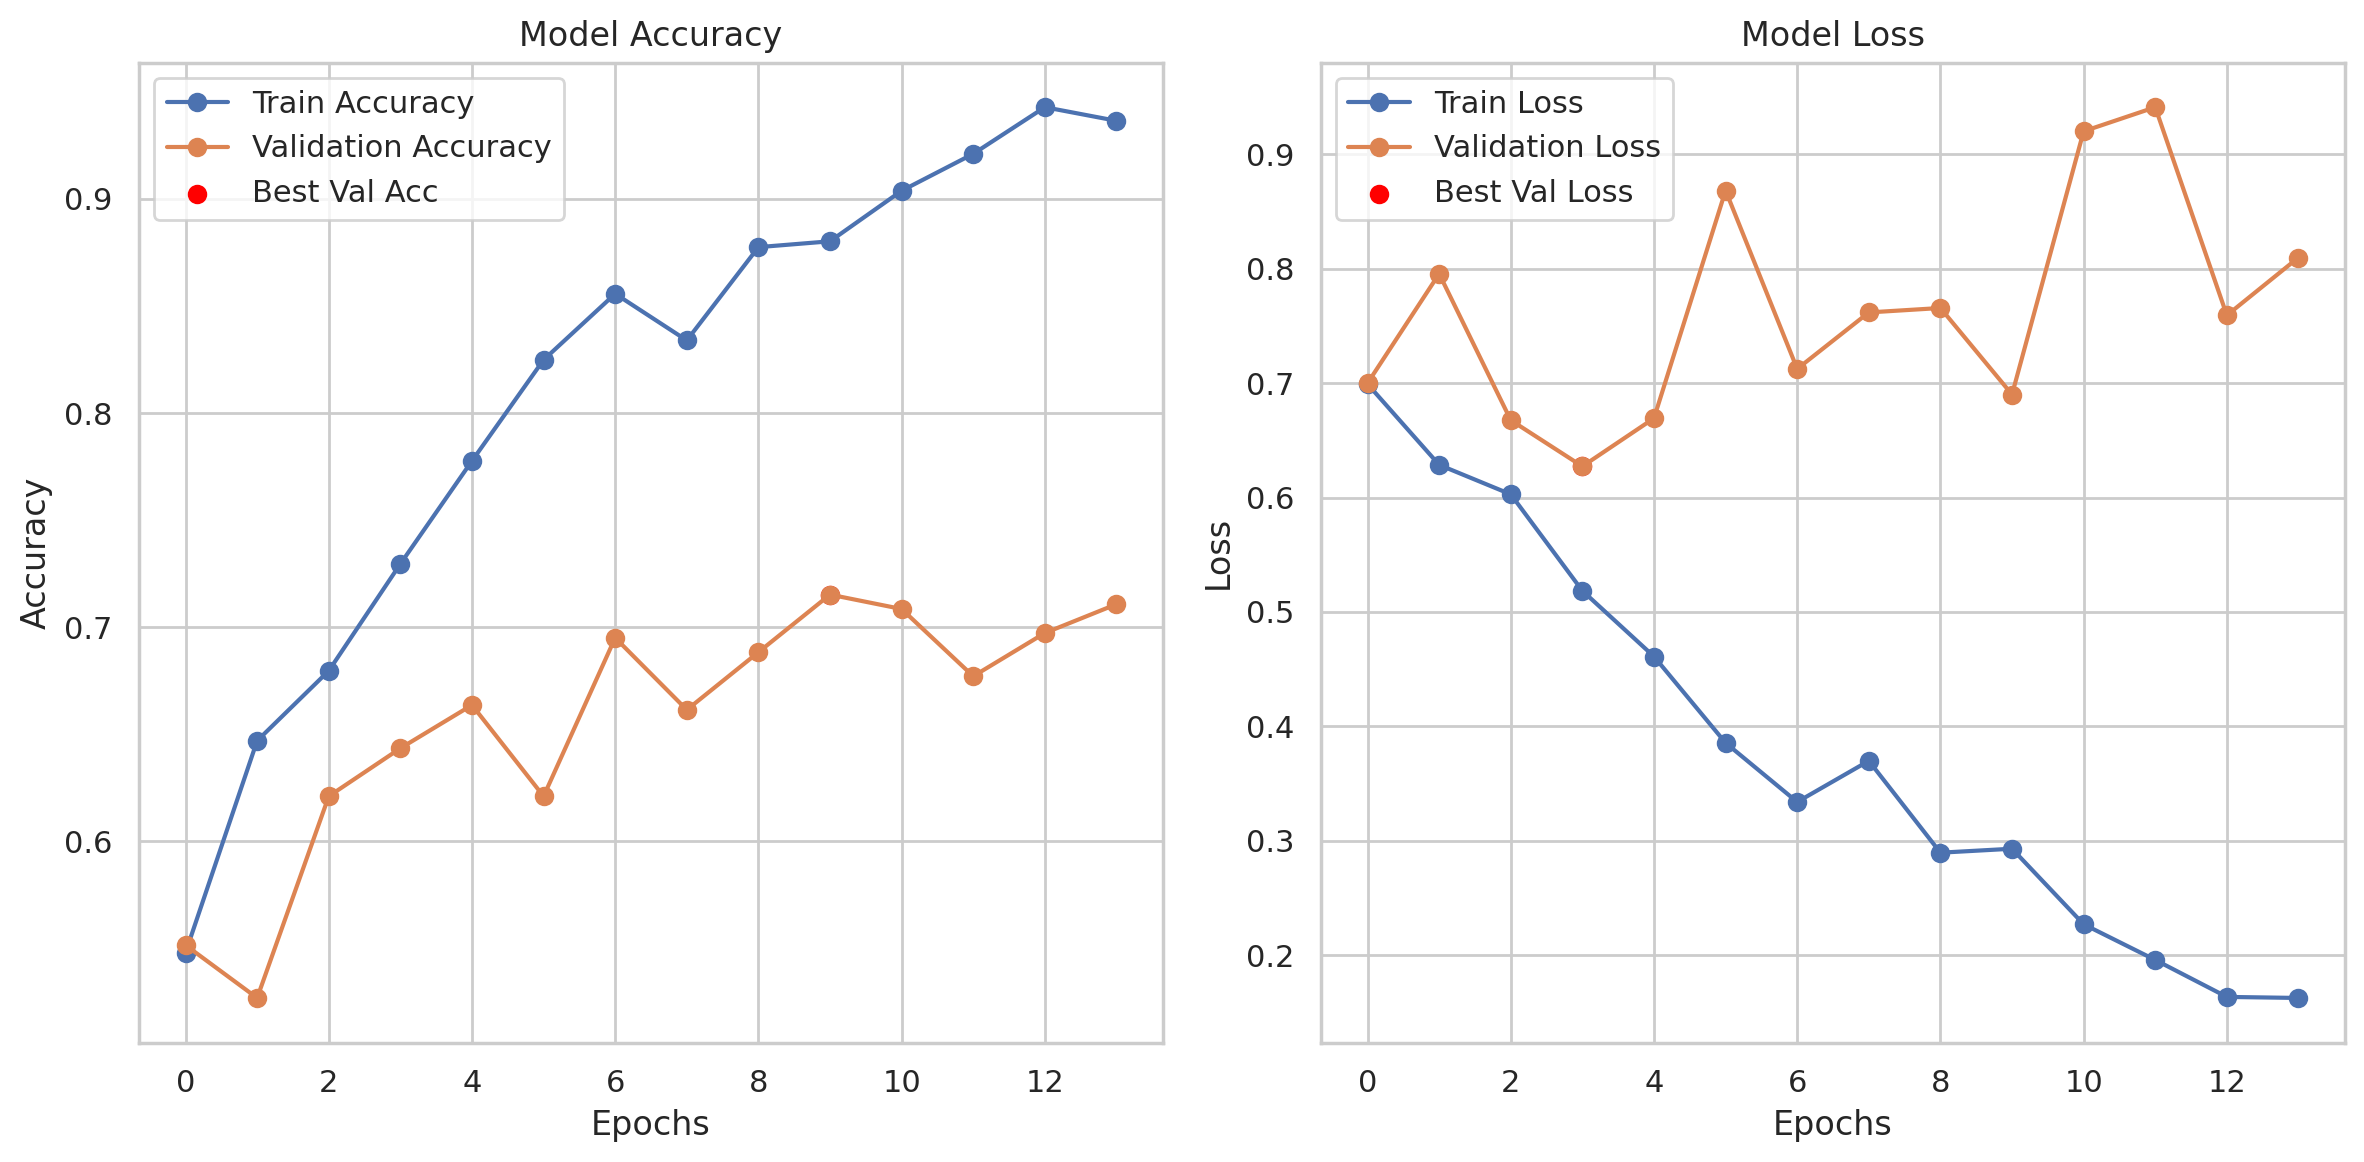

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Get training history safely (handles missing keys)
train_acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])
train_loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy", marker="o", linestyle="-")
plt.plot(val_acc, label="Validation Accuracy", marker="o", linestyle="-")

# Highlight the best validation accuracy point
if val_acc:
    best_epoch = val_acc.index(max(val_acc))  # Find epoch with best val_acc
    plt.scatter(best_epoch, max(val_acc), color="red", label="Best Val Acc")

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.grid(True)

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss", marker="o", linestyle="-")
plt.plot(val_loss, label="Validation Loss", marker="o", linestyle="-")

# Highlight the best validation loss point
if val_loss:
    best_epoch = val_loss.index(min(val_loss))  # Find epoch with lowest val_loss
    plt.scatter(best_epoch, min(val_loss), color="red", label="Best Val Loss")

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# ✅ Use TensorFlow dataset instead of NumPy arrays
test_loss, test_accuracy = model.evaluate(test_set, verbose=1)

print(f"\n✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.6681 - loss: 0.6022

✅ Test Loss: 0.6434
✅ Test Accuracy: 0.6484


22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 333ms/step


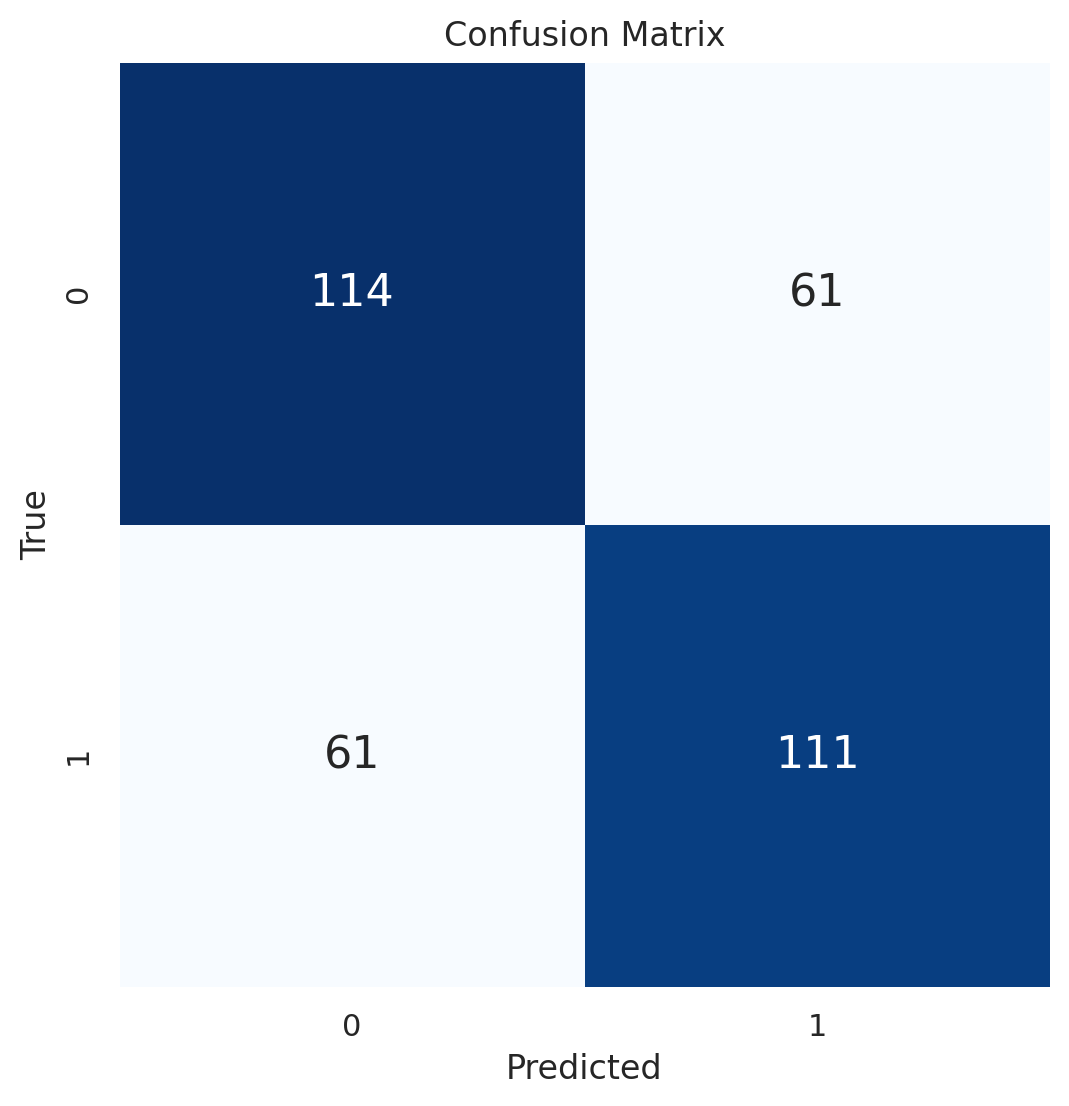


✅ Classification Report:
              precision    recall  f1-score   support

        REAL       0.65      0.65      0.65       175
        FAKE       0.65      0.65      0.65       172

    accuracy                           0.65       347
   macro avg       0.65      0.65      0.65       347
weighted avg       0.65      0.65      0.65       347



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Get model predictions using the TensorFlow dataset (NOT X_test)
y_pred_probs = model.predict(test_set, verbose=1)  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  # Convert to binary labels (0 or 1)

# ✅ Convert true labels (y_test) from TensorFlow dataset
y_true = np.concatenate([y for _, y in test_set], axis=0)  # Extract y_test correctly

# ✅ Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ✅ Print Classification Report
print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=["REAL", "FAKE"]))


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# ✅ Get true labels from TensorFlow dataset
y_true = np.concatenate([y.numpy() for _, y in test_set], axis=0)  # Convert tensors to NumPy

# ✅ Get model predictions using the TensorFlow dataset
y_pred_probs = model.predict(test_set, verbose=1)  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  # Convert to binary labels

# ✅ Print Classification Report
print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=["REAL", "FAKE"]))


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step

✅ Classification Report:
              precision    recall  f1-score   support

        REAL       0.65      0.65      0.65       175
        FAKE       0.65      0.65      0.65       172

    accuracy                           0.65       347
   macro avg       0.65      0.65      0.65       347
weighted avg       0.65      0.65      0.65       347



In [ ]:
import os

# ✅ Ensure the directory exists before saving
save_path = "/content/drive/MyDrive/redeepfake_model.h5"

# ✅ Save the model safely
model.save(save_path, save_format="h5")

print(f"\n✅ Model saved successfully at: {os.path.abspath(save_path)}")



✅ Model saved successfully at: /content/drive/MyDrive/redeepfake_model.h5


In [ ]:
# ✅ Step 2: Define model path in Google Drive
model_path = "/content/drive/MyDrive/redeepfake_model.h5"

# ✅ Step 3: Check if the file exists before loading
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print("\n✅ Model loaded successfully from Google Drive!")
else:
    print("\n❌ Model file not found! Check if the file exists in Google Drive.")


✅ Model loaded successfully from Google Drive!


In [ ]:
import cv2
import tensorflow as tf
import numpy as np

def preprocess_image(image_path):
    """Loads, resizes, and preprocesses an image for EfficientNet."""
    img = cv2.imread(image_path)

    # ✅ Handle missing or corrupt images
    if img is None:
        print(f"❌ Warning: Image not found or cannot be read -> {image_path}")
        return None

    img = cv2.resize(img, (224, 224))  # Resize to EfficientNet input size
    img = img.astype(np.float32)  # ✅ Convert to float32 for preprocessing
    img = tf.keras.applications.efficientnet.preprocess_input(img)  # Normalize input
    return img


In [ ]:
import os

test_image_paths = []
image_folder = "/content/drive/MyDrive/faces_224/"  # ✅ Correct Google Drive path

# ✅ Ensure we don't exceed available indices
num_samples = min(25, len(Test_set_filtered))  # Ensure at most 25 images
selected_indices = Test_set_filtered.index[:num_samples]  # Select first 25 available indices

# ✅ Append valid image paths and labels
for idx in selected_indices:
    file_path = os.path.join(image_folder, Test_set_filtered.loc[idx, "videoname"][:-4] + ".jpg")
    label = Test_set_filtered.loc[idx, "label"]
    test_image_paths.append((file_path, label))

print(f"\n✅ Collected {len(test_image_paths)} test images for inference.")



✅ Collected 25 test images for inference.


Sab thik haa par yaha se jab run karo final tho max fake images atte because model ke pass bhaut sarre fake images haa

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15), dpi=300)

# ✅ Ensure we don't exceed 5x5 grid
num_images = min(len(test_image_paths), 25)

for idx, (image_path, label) in enumerate(test_image_paths[:num_images]):
    processed_image = preprocess_image(image_path)

    # ✅ Handle missing or unreadable images
    if processed_image is None:
        print(f"❌ Skipping missing image: {image_path}")
        continue

    processed_image = np.expand_dims(processed_image, axis=0)
    prediction = model.predict(processed_image)

    # ✅ Binary classification with threshold 0.33
    predicted_class = "FAKE" if prediction[0, 0] > 0.33 else "REAL"
    true_label = "FAKE" if label == "FAKE" else "REAL"  # Ensure consistency in label format

    plt.subplot(5, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img = cv2.imread(image_path)

    # ✅ Handle missing images
    if img is None:
        print(f"❌ Skipping display for missing image: {image_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

    plt.xlabel(f'{predicted_class} | {prediction[0, 0]:.2f} | {"T" if predicted_class == true_label else "F"}')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
